# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [ ]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file

In [ ]:
df = pd.read_csv('zsu_cv1_data.csv', sep=',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Price is the most interisting attribute in our dataset, let's take a look on its distribution

#### Vizualize house prices in form of histogram
- What does it tell us about the prices?

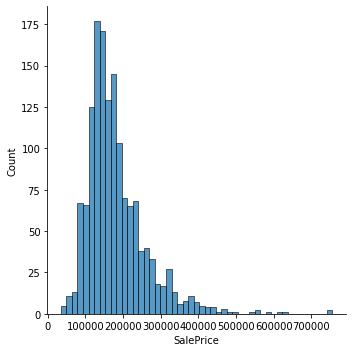

In [ ]:
sns.displot(df.SalePrice)

#### Modify bins
- Perhaps we want to visualize the histogram with more dense or coarse bins
- *bins* attribute

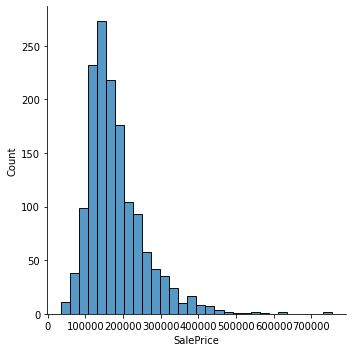

In [ ]:
sns.displot(df.SalePrice, bins=30)

#### Add probability density curve (Kernel density estimation)

We can use parameter *kde* if we want to show estimation of probability density function.

Modify colors of plot, use parameters:
- *color* 
- *edgecolor*

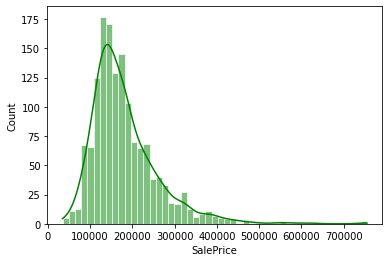

In [ ]:
sns.histplot(df.SalePrice, kde=True, edgecolor='white',color='green')

#### Use quartiles (Q1, Q3) for highlighting most common price range in histogram

Check functions *describe* and *quantile* over price column

In [ ]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
df.SalePrice.quantile(0.25), df.SalePrice.quantile(0.75)

(129975.0, 214000.0)

#### Use function *axvline* from Matplotlib to draw vertical lines at the quartile positions

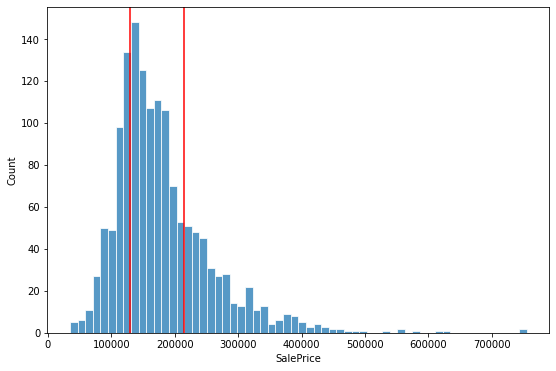

In [ ]:
fig = plt.figure(figsize=(9, 6))
sns.histplot(df.SalePrice, bins=60,edgecolor='white')
plt.axvline(df.SalePrice.quantile(0.25),color='red')
plt.axvline(df.SalePrice.quantile(0.75),color='red')

## Let's add more complexity to histogram vizualizations. Does price change for different values of GaragaFinish attribute?

#### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished	
- Unf	Unfinished
- NA	No Garage

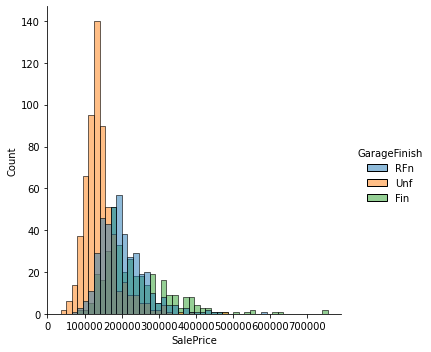

In [ ]:
sns.displot(data=df,x='SalePrice',hue='GarageFinish')

### We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

In [ ]:
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')

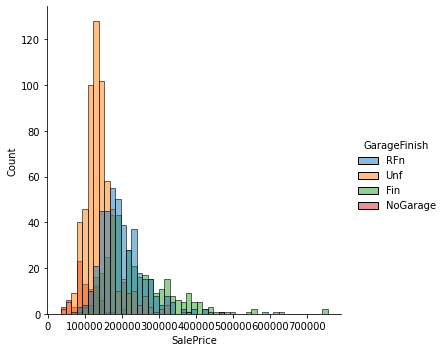

In [ ]:
sns.displot(data=df,x='SalePrice',hue='GarageFinish')

### Sometimes the histograms distinguished by colors are not easily redeable
- We can use *col* attribute to automatically plot every histogram on its own canvas

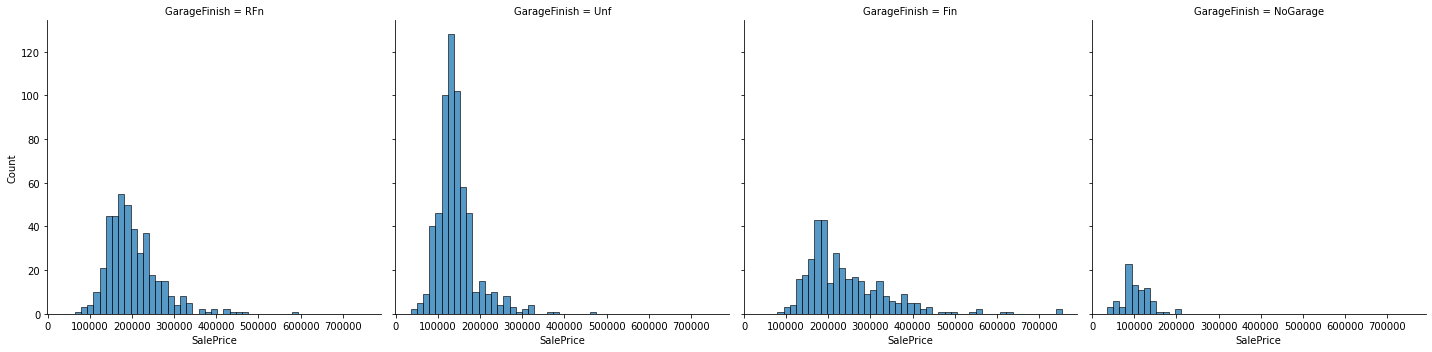

In [ ]:
sns.displot(data=df,x='SalePrice',col='GarageFinish')

## Cumulative distribution plot usage
Task: I want to buy a house with live area of 150 m^2 maximum (1614 ft^2), how much choice do I have?
- How to solve the task visually? We can make use of *ecdfplot*

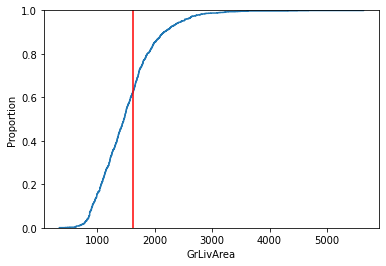

In [ ]:
sns.ecdfplot(df.GrLivArea)
plt.axvline(1614,color='red')

### Moreover we may be interested in types of building so we can distinguish the houses by *BldgType* attribute

#### BldgType: Type of dwelling
- 1Fam	Single-family Detached	
- 2FmCon	Two-family Conversion; originally built as one-family dwelling
- Duplx	Duplex
- TwnhsE	Townhouse End Unit
- TwnhsI	Townhouse Inside Unit

https://housing.com/news/what-is-a-duplex-house/

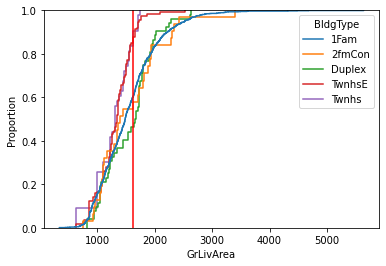

In [ ]:
sns.ecdfplot(data=df,x='GrLivArea',hue='BldgType')
plt.axvline(1614,color='red')

### Zoom in using the *xlim* function

(500.0, 2500.0)

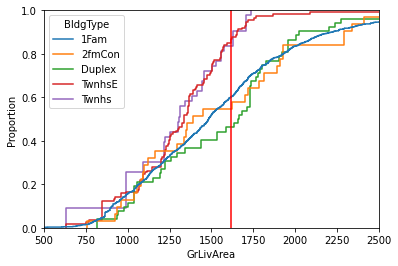

In [ ]:
sns.ecdfplot(data=df,x='GrLivArea',hue='BldgType')
plt.axvline(1614,color='red')
plt.xlim(500,2500)

### Another very useful tecnique for the numerical features distributions are boxplots
- Did you see any of these before?
- How should we read them?
    - Quartiles
    - Median
    - Box size
    - Outliers and IQR
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

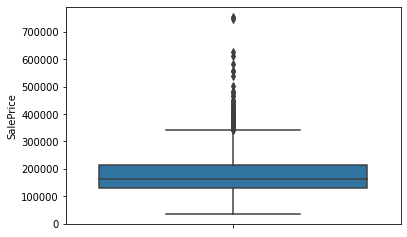

In [ ]:
sns.boxplot(data=df,y='SalePrice')

## Let's take a look at the *SalePrice* for different *BldgType* values 
- What can we say about the prices?

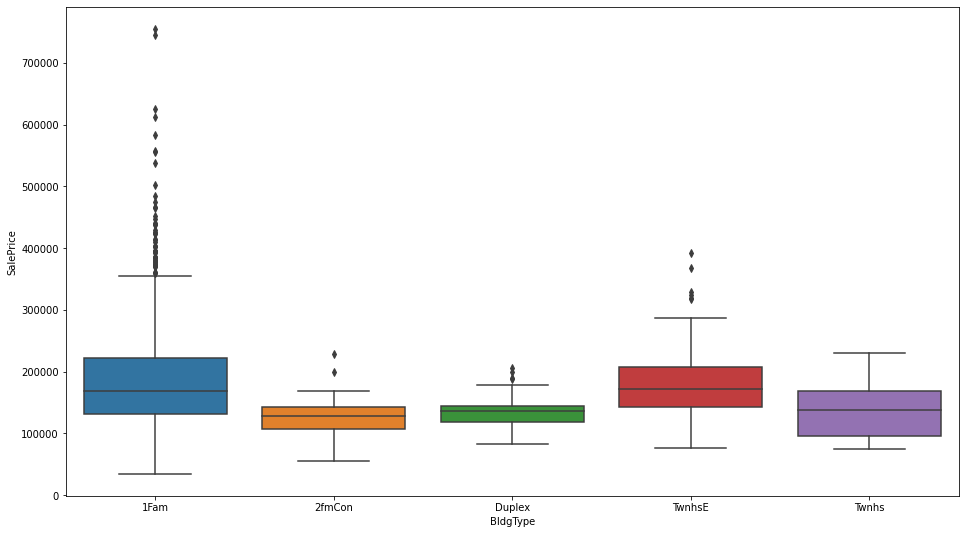

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.boxplot(data=df,y='SalePrice', x='BldgType')

## We can do the same for *GrLivArea*

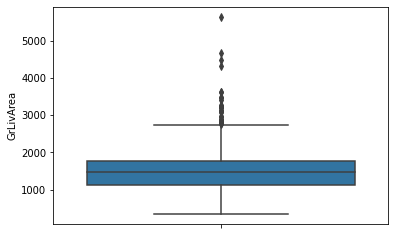

In [ ]:
sns.boxplot(data=df,y='GrLivArea')

## Let's take a look at the *GrLivArea* for different *BldgType* values 
- What can we say about the GrLivArea?

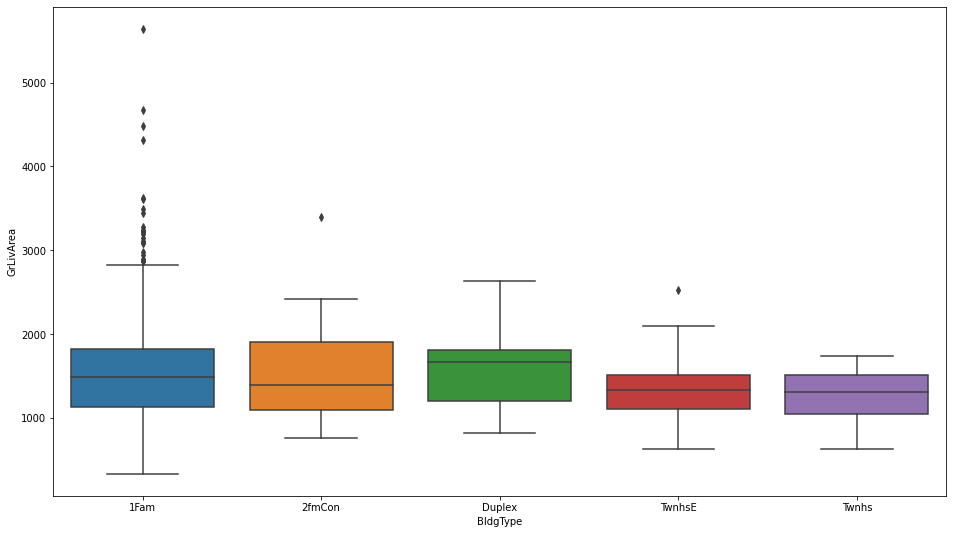

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.boxplot(data=df,y='GrLivArea',x='BldgType')

### We can use standard *scatterplot* with *BldgType* as a *hue* so we can better grasp the relationship between *GrLivArea* and *SalePrice*

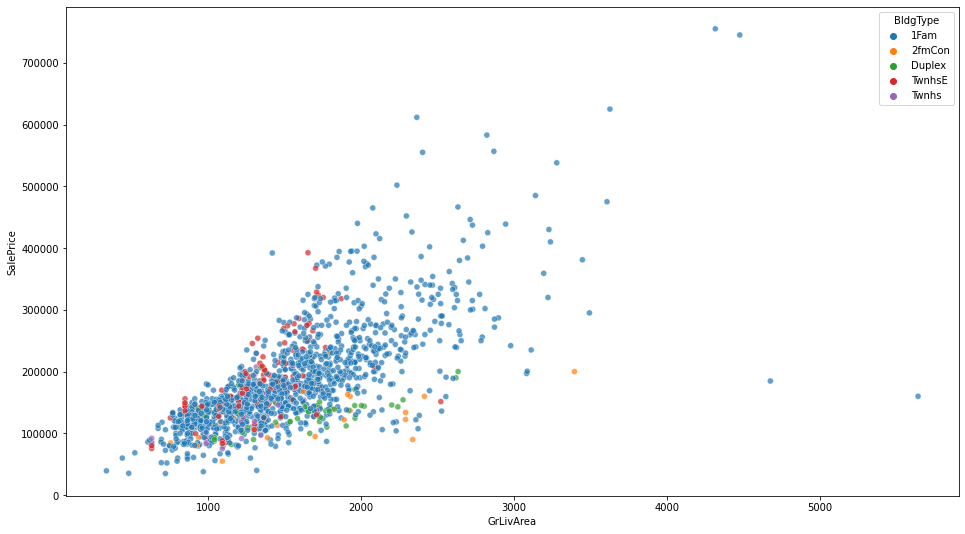

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.scatterplot(data=df,x='GrLivArea',y='SalePrice',hue='BldgType',alpha=0.7)

### We can see there are some outliers in the data, let's zoom only to area without them, how can we filter the data?

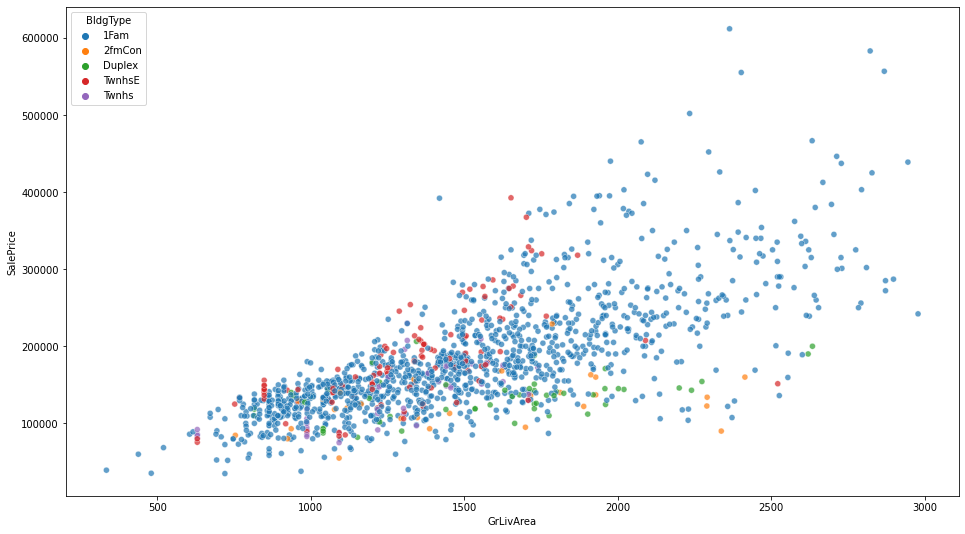

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.scatterplot(data=df[df.GrLivArea < 3000],x='GrLivArea',y='SalePrice',hue='BldgType',alpha=0.7)

## We have an information about a month and a year for the sold houses.
### Can you vizualize what was the average price of the house by quarters?

* We need to create a new columns with merged Year and Quarter information in this pattern: '2010-Q1','2010-Q2', etc.
* We can map the values using the *apply* function or use string concatenation directly
* If you need to change data type of the columns, you can use *astypy*

In [ ]:
df['QuarterSold'] = df.MoSold // 4 + 1
df['YearQuarterSold'] = df.YrSold.astype(str) + '-' + df.QuarterSold.astype(str)
df.YearQuarterSold.head()

0    2008-1
1    2007-2
2    2008-3
3    2006-1
4    2008-4
Name: YearQuarterSold, dtype: object

In [ ]:
df['YearQuarterSoldApply']=df.loc[:,['MoSold','YrSold']].apply(lambda x:f'{x[1]}-{(x[0]//4+1)}', axis=1)
df.YearQuarterSoldApply.head()

0    2008-1
1    2007-2
2    2008-3
3    2006-1
4    2008-4
Name: YearQuarterSoldApply, dtype: object

### Compute the average price for the *YearQuarterSold* attribute

In [ ]:
df_agg = df.groupby('YearQuarterSold').SalePrice.mean().reset_index(name='MeanPrice')
df_agg.head()


,YearQuarterSold,MeanPrice
0,2006-1,190553.522727
1,2006-2,173835.900000
2,2006-3,197681.705128
3,2006-4,185545.000000
4,2007-1,178489.159091


## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

<function matplotlib.pyplot.show(*args, **kw)>

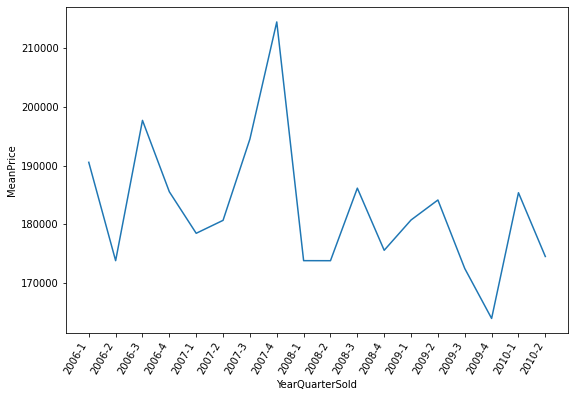

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_agg, x='YearQuarterSold',y='MeanPrice')
plt.xticks(rotation=60,horizontalalignment='right')
plt.show

### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [ ]:
df.groupby('YearQuarterSold').SalePrice.describe().reset_index()

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-1,44.0,190553.522727,71075.435079,52500.0,142875.0,172700.0,228250.0,423000.0
1,2006-2,180.0,173835.900000,78147.648285,79000.0,129675.0,157500.0,197725.0,625000.0
2,2006-3,78.0,197681.705128,86560.713023,35311.0,133625.0,178000.0,244933.5,465000.0
3,2006-4,12.0,185545.000000,69292.448559,98600.0,132000.0,175000.0,236000.0,290000.0
4,2007-1,44.0,178489.159091,119137.563987,39300.0,122000.0,145450.0,200125.0,755000.0
5,2007-2,176.0,180689.732955,82447.813812,79000.0,129000.0,156000.0,205787.5,745000.0
6,2007-3,91.0,194509.890110,72455.235610,64500.0,137500.0,181000.0,238500.0,392000.0
7,2007-4,18.0,214414.500000,81118.090800,84500.0,144750.0,231000.0,268975.0,340000.0
8,2008-1,41.0,173837.951220,73278.323817,55000.0,127000.0,159895.0,192000.0,412500.0
9,2008-2,164.0,173830.396341,63180.075472,40000.0,135000.0,165200.0,200450.0,385000.0


In [ ]:
df_agg = df.groupby('YearQuarterSold').SalePrice.describe().reset_index()
df_melt = pd.melt(df_agg, id_vars=['YearQuarterSold'],value_vars=['min','max','mean','50%'])
df_melt.head()

,YearQuarterSold,variable,value
0,2006-1,min,52500.0
1,2006-2,min,79000.0
2,2006-3,min,35311.0
3,2006-4,min,98600.0
4,2007-1,min,39300.0


## What can we say about the minimum and maximum values?
- hint - std. deviation? outliers?

<function matplotlib.pyplot.show(*args, **kw)>

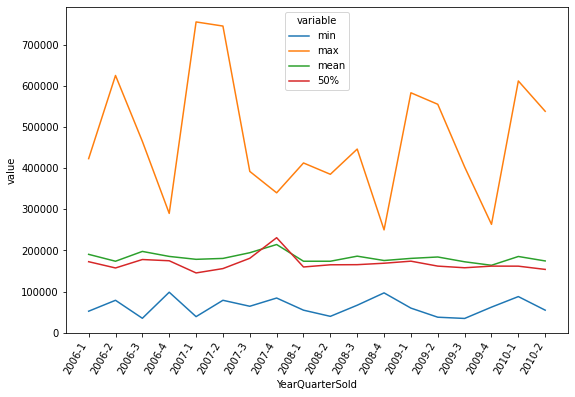

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_melt, x='YearQuarterSold',y='value',hue='variable')
plt.xticks(rotation=60,horizontalalignment='right')
plt.show

# We can take a look at number of sold houses for the defined time periods as well
- We will use standard bar plot
- In which quarter were the most houses sold?
- Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

In [ ]:
df_cnt = df.groupby('YearQuarterSold').Id.count().reset_index(name='Count')
df_cnt

,YearQuarterSold,Count
0,2006-1,44
1,2006-2,180
2,2006-3,78
3,2006-4,12
4,2007-1,44
5,2007-2,176
6,2007-3,91
7,2007-4,18
8,2008-1,41
9,2008-2,164


<function matplotlib.pyplot.show(*args, **kw)>

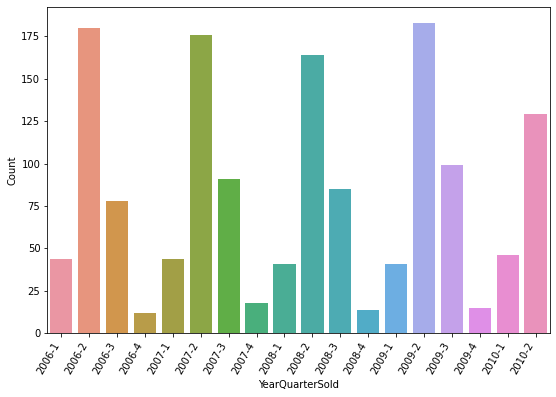

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.barplot(data=df_cnt, x='YearQuarterSold',y='Count')
plt.xticks(rotation=60,horizontalalignment='right')
plt.show

# Tasks
## Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*)


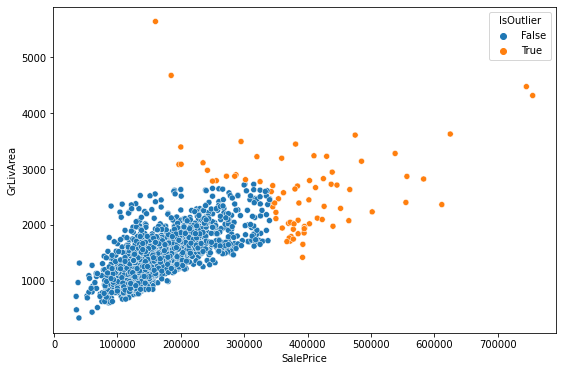

In [ ]:
IQRSalePrice = df.SalePrice.quantile(0.75) - df.SalePrice.quantile(0.25)
IQRGrLivArea = df.GrLivArea.quantile(0.75) - df.GrLivArea.quantile(0.25)

LowerBoundPrice = df.SalePrice.quantile(0.25) - 1.5*IQRSalePrice
UpperBoundPrice = df.SalePrice.quantile(0.75) + 1.5*IQRSalePrice

LowerBoundLivArea = df.GrLivArea.quantile(0.25) - 1.5*IQRGrLivArea
UpperBoundLivArea = df.GrLivArea.quantile(0.75) + 1.5*IQRGrLivArea

df['IsOutlier'] = False
df.loc[((df.SalePrice < LowerBoundPrice)|(df.SalePrice > UpperBoundPrice))|((df.GrLivArea < LowerBoundLivArea)|(df.GrLivArea > UpperBoundLivArea)),'IsOutlier'] = True

fig = plt.figure(figsize=(9,6))
sns.scatterplot(data = df, x="SalePrice", y="GrLivArea", hue="IsOutlier")

## Task 2 - Describe what you see in the data (1p)
- Try to vizualize the relationship between *SalePrice* and *OverallQual*
    - You can use BoxPlots, Scatter plots, etc.
- Describe the insight you got from the plots with a few sentences
- Do the same for *SalePrice* and *OverallCond*; i.e. vizualize and describe insight

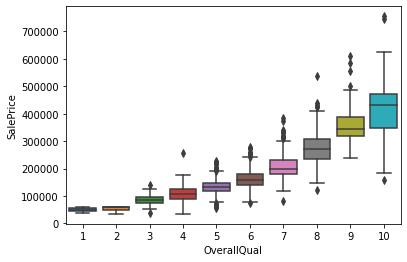

In [ ]:
sns.boxplot(data = df, y="SalePrice", x="OverallQual")

S rostoucí kvalitou se zvyšuje i cena domu.Nejdražší dům je kvality 10

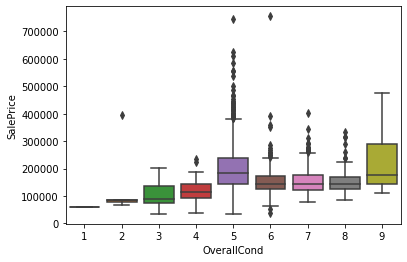

In [ ]:
sns.boxplot(data = df, y="SalePrice", x="OverallCond")

1. má minimální zastoupení. Pětka a devítka mají podobné ceny s tím, že 5 má nejvíce outlieru. Nejdražší dům má OverallCond 6